# USFS Risk Maps

This notebook demonstrates how to pull risk maps from the [USFS ArcGIS Page](https://livingatlas.arcgis.com/en/browse/?q=%22Wildfire%20Risk%20to%20Communities%22#d=2&q=%22Wildfire%20Risk%20to%20Communities%22&type=layers) to GeoTIFFs, which are post-processed into CSVs for rendering in Plotly.

## Step 1

Click on a map layer you wish to export. For example, we'll use the [Wildfire Risk to Communities Wildfire Hazard Potential](https://www.arcgis.com/home/item.html?id=9274dfe5318540d7a09f0117c0be0730) layer. Click on the blue "metadata" box on the right side of the page.

## Step 2

In the metadata page, there should be an "Online location" field with a URL to a USDA server. For our example, this link is [https://apps.fs.usda.gov/fsgisx01/rest/services/RDW_Wildfire/RMRS_WRC_WildfireHazardPotential/ImageServer](https://apps.fs.usda.gov/fsgisx01/rest/services/RDW_Wildfire/RMRS_WRC_WildfireHazardPotential/ImageServer). Navigate to this page.

## Step 3

This "ImageServer" page should be a REST API documentation page. Scroll to the bottom of this page and click on the "Export Image" link. For our example, this link is [https://apps.fs.usda.gov/fsgisx01/rest/services/RDW_Wildfire/RMRS_WRC_WildfireHazardPotential/ImageServer/exportImage?bbox=-2.00375070672E7,2142713.212809855,2.0037502337020043E7,1.15583263358E7](https://apps.fs.usda.gov/fsgisx01/rest/services/RDW_Wildfire/RMRS_WRC_WildfireHazardPotential/ImageServer/exportImage?bbox=-2.00375070672E7,2142713.212809855,2.0037502337020043E7,1.15583263358E7).

## Step 4

In the webform on this "Export Image" page, enter the following information:

- Bounding Box: -122.4000416897913, 36.6915923915559, -121.01852570346, 37.68465755640763
- Bounding Box Spatial Reference: 4326
- Image Size: 1000, 1000
- Image Spatial Reference: 4326
- Image Format: tiff
- Pixel Type: S32

Leave other fields at their default values. Click "Export Image (GET)," then click "Download Image" when you are returned to the same page.

## Step 5

Follow the steps below to load the TIFF into Python, convert it to a CSV, and render in Plotly.

In [5]:
import os
import xarray as xr
import rioxarray
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'C:\\Documents\\MSU\\SS22\\CSE 498\\CapstoneExploration\\exploration\\data'

In [6]:
risk = xr.open_dataset("../../app/data/risk.tif", engine="rasterio")
risk

<xarray.Dataset>
Dimensions:      (band: 1, x: 1000, y: 1000)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -122.4 -122.4 -122.4 ... -121.0 -121.0 -121.0
  * y            (y) float64 37.88 37.88 37.88 37.87 ... 36.5 36.5 36.5 36.5
    spatial_ref  int32 ...
Data variables:
    band_data    (band, y, x) float64 ...

In [7]:
df = risk.to_dataframe()
df.reset_index(inplace=True)
df.dropna(inplace=True)
df.drop(["band", "spatial_ref"], axis=1, inplace=True)
df.head()

,x,y,band_data
0,-122.399351,37.878192,0.0
1,-122.399351,37.876811,0.0
2,-122.399351,37.875429,0.0
3,-122.399351,37.874048,0.0
4,-122.399351,37.872666,0.0


In [8]:
df.describe()

,x,y,band_data
count,1000000.000000,1000000.000000,1000000.000000
mean,-121.709284,37.188125,772.317760
std,0.398809,0.398809,1234.237317
min,-122.399351,36.498058,0.000000
25%,-122.054317,36.843091,0.000000
50%,-121.709284,37.188125,274.000000
75%,-121.364250,37.533159,957.000000
max,-121.019216,37.878192,13044.000000


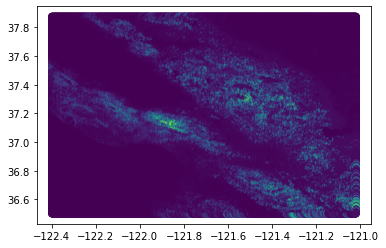

In [9]:
plt.scatter(df["x"], df["y"], c=df["band_data"])
plt.show()